In [24]:
import numpy as np
from matplotlib.pylab import plt
import math

## Exercise 3.5

In [25]:
def gradient_descent_q1(init, iteration, step):
    
    
    values = []
    w = init
    
    for x in range(0,iteration):
        
        #gw = (1/50)*(4*w**3+2*w+10)
        gw = 1/25*(2*w**3 + w**1 + 5)
        w = w - gw*step
      
        
        fw = (1/50)*(w**4 + w**2 + 10*w)
        values.append(fw)
    return values

### step = 1

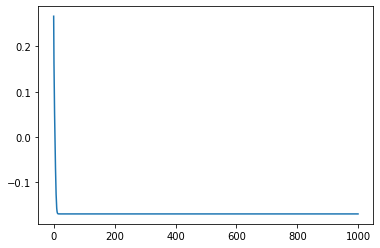

In [27]:
values = gradient_descent_q1(init=2.0, iteration=1000, step=1)
plt.plot(values)

### step = 0.1

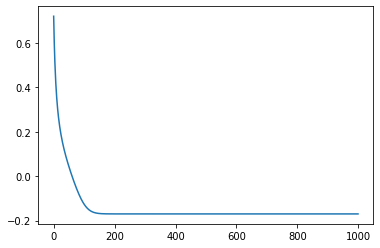

In [28]:
values = gradient_descent_q1(init=2.0, iteration=1000, step=0.1)
plt.plot(values)

### step = 0.01

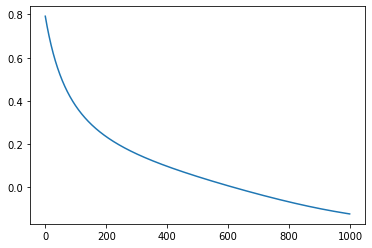

In [35]:
values = gradient_descent_q1(init=2.0, iteration=1000, step=0.01)
plt.plot(values)

## Exercise 3.5

In [37]:
def gradient_descent_q2(init, iteration=100, step=1):
    
    values = []
    
    w = init
    
    for x in range(0, iteration):
        
                
        gw = 2*w
        w = w - gw*step
        fw = np.dot(w.T, w)
        
        values.append(fw)
        
    return values

### step = 0.001

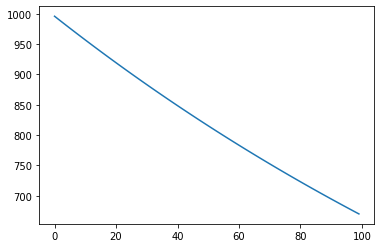

In [32]:
init = np.ones((10,))*10
values = gradient_descent_q2(init=init , iteration=100, step=0.001)
plt.plot(values)

### step = 0.1 (best parameter)

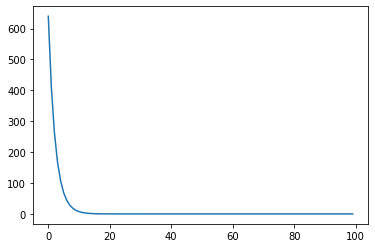

In [49]:
init = np.ones((10,))*10
values = gradient_descent_q2(init=init , iteration=100, step=0.1)
plt.plot(values)

### step = 1

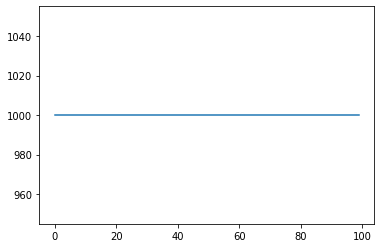

In [50]:
init = np.ones((10,))*10
values = gradient_descent_q2(init=init , iteration=100, step=1)
plt.plot(values)

## Exercise 3.9

In [51]:
def mom_gradient_descent_q3(init, a=0, b=np.zeros(2,), C=np.array([[0.5, 0], [0, 9.75]]), beta=0.2, step=0.1, iteration=25):
    values = []
    
    w = init
    d = 0
    
    for x in range(0, iteration):
        
        fw = a + np.dot(b.T, w) + np.dot(np.dot(w.T, C), w)
        gw = b.T + np.dot(2*C, w)
        d = beta*d + (1-beta)*gw
        w = w - step*d
        fw = a + np.dot(b.T, w) + np.dot(np.dot(w.T, C), w)
        values.append(fw)
    return values
    

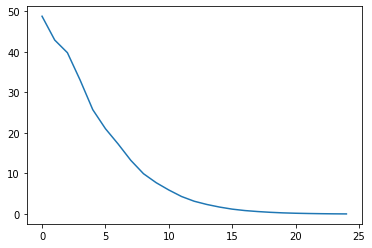

In [52]:
init = np.array([10,1])
values = mom_gradient_descent_q3(init, a=0, b=np.zeros(2,), C=np.array([[0.5, 0], [0, 9.75]]), beta=0.7)
plt.plot(values)

## Exercise 3.10

In [53]:
def std_gradient_descent_q4(init, step = 0.1, iteration=1000):
    
    values = []
    w = init
    
    for x in range(0, iteration):
        
        
        #fw, gw = gd(w)
        
        
        fw = np.tanh(4*w[0] + 4*w[1]) + np.maximum(1, 0.4*w[0]**2) + 1
        shared_gw = (1 - np.tanh(4*w[0] + 4*w[1])**2)*4
        g_w2 = shared_gw
        
        if (w[0] > -1*math.sqrt(5/2) and w[0] < math.sqrt(5/2)):
            g_w1 = shared_gw + 0
        else:
            g_w1 = shared_gw + 0.8 * w[0]
            
        gw = np.array([g_w1, g_w2])
        gw_norm = np.linalg.norm(gw)
        if gw_norm == 0 :
            gw_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
        
        gw /= gw_norm
        w = w - gw*step
        #fw = func_w(w)
        fw = np.tanh(4*w[0] + 4*w[1]) + np.maximum(1, 0.4*w[0]**2) + 1
        values.append(fw)
        
        
    return values
    

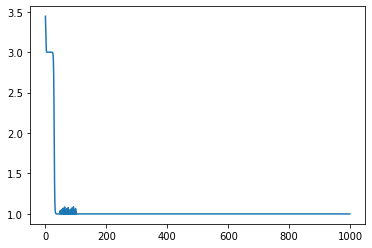

In [54]:
init = np.array([2.0, 2.0])
values = std_gradient_descent_q4(init, step = 0.1, iteration=1000)
plt.plot(values)

## Exercise 3.11

In [55]:
from autograd import numpy as np
from autograd import value_and_grad 

def comp_gradient_descent_q5(init, step = 0.1, iteration=1000, comp_wise = False):
    
    values = []
    w = init
    
    func_w = lambda w: np.max(np.tanh(4*w[0] + 4*w[1]),0) + np.abs(0.4*w[0]) + 1
    
    gradient = value_and_grad(func_w)


    
    for x in range(0, iteration):
        
        
        
#         if np.tanh(4*w[0] + 4*w[1]) > 0:
#             shared_gw = (1 - np.tanh(4*w[0] + 4*w[1])**2) * 4
#         else:
#             shared_gw = 0
            
#         g_w2 = shared_gw
        
#         g_w1 = shared_gw + 0.4*w[0]/np.abs(w[0])
            
#         gw = np.array([g_w1, g_w2])

        fw,gw = gradient(w)
        
        if comp_wise == False:
            gw_norm = np.linalg.norm(gw)
            if gw_norm == 0 :
                gw_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            gw /= gw_norm
        
        else:
            comp_norm = np.abs(gw) + 10**(-8)
            gw /= comp_norm
            
        w = w - gw*step
        #fw = np.max(np.tanh(4*w[0] + 4*w[1]),0) + np.abs(0.4*w[0]) + 1
        values.append(fw)
        
        
    return values
    

### standard normalized

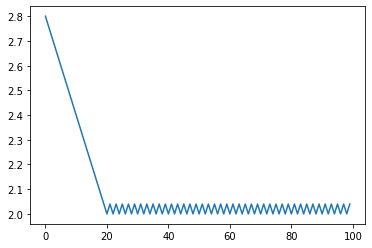

In [56]:
init = np.array([2.0, 2.0])
values = comp_gradient_descent_q5(init, step = 0.1, iteration=100, comp_wise=False)
plt.plot(values)

### Component-Wise

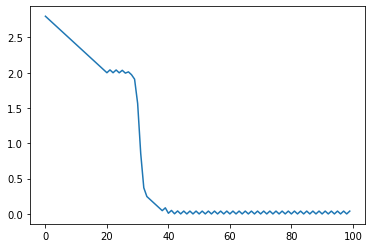

In [57]:
init = np.array([2.0, 2.0])
values = comp_gradient_descent_q5(init, step = 0.1, iteration=100, comp_wise=True)
plt.plot(values)